In [ ]:

import pickle

import pandas as pd
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from utils import *

# setup + import on pre-processed data:
data = pd.read_csv('../data_processed/hpc_job_scheduling_with_timestamps.csv')
pickle_file = open('../data_processed/hpc_job_scheduling_with_timestamps.pkl', 'rb')
feature_structure = pickle.load(pickle_file)
pickle_file.close()

feature_columns = feature_structure['bin'] + feature_structure['cat'] + feature_structure['cont'] + feature_structure[
    'ord']
X = data[feature_columns]
y = data['Class']

# Split Data
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)
train_X.head()


In [ ]:
def run_classifiers(input_classifiers):
    for clf in input_classifiers:
        clf_name = clf.__class__.__name__
        model_pipeline = get_pipeline(feature_structure, clf=clf)
        model_pipeline.fit(train_X, train_y)
    
        # Predictions and evaluation
        predictions = model_pipeline.predict(test_X)
        print(f"Results for {clf_name}:")
        print("Accuracy:", accuracy_score(test_y, predictions))
        print("Confusion Matrix:\n", confusion_matrix(test_y, predictions))
        print("Classification Report:\n", classification_report(test_y, predictions, zero_division=1))
        print("\n----------------------\n")

In [ ]:
classifiersSVC = [
    SVC(kernel='linear', random_state=42),
    SVC(kernel='rbf', random_state=42),
    SVC(kernel='poly', random_state=42),
    SVC(kernel='sigmoid', random_state=42),
]

resultsSVC = evaluate_models(data, feature_structure, classifiersSVC)
resultsSVC

In [ ]:
classifierKneighbors = [ KNeighborsClassifier(n_jobs=-1, n_neighbors=k) for k in range(2, 13)]
resultsKNeighbors = evaluate_models(data, feature_structure, classifierKneighbors)
resultsKNeighbors

In [ ]:
classifierDecisionTree = [ DecisionTreeClassifier(random_state=42, max_depth=depth) for depth in range(3, 15)]
resultsDecisionTree = evaluate_models(data, feature_structure, classifierDecisionTree)
resultsDecisionTree

In [ ]:
# Latex

print(results_to_latex(resultsKNeighbors, "Results HPC k-NN", "bc_knn"))
print("\n")
print(results_to_latex(resultsDecisionTree, "Results HPC Decision Trees", "bc_dt"))
print("\n")
print(results_to_latex(resultsSVC, "Results HPC SVC", "bc_svc"))

## Original dataset

In [24]:
# Evaluate on original dataset:
data = pd.read_csv('../data_processed/hpc_job_scheduling_original.csv')
pickle_file = open('../data_processed/hpc_job_scheduling_original.pkl', 'rb')
feature_structure = pickle.load(pickle_file)
pickle_file.close()



feature_columns = feature_structure['bin'] + feature_structure['cat'] + feature_structure['cont'] + feature_structure[
    'ord']

X = data[feature_columns]
y = data[feature_structure['target']]


In [ ]:
resultsKNeighbors = evaluate_models(data, feature_structure, classifierKneighbors)
resultsKNeighbors

In [ ]:
resultsDecisionTree = evaluate_models(data, feature_structure, classifierDecisionTree)
resultsDecisionTree

In [ ]:
resultsSVC = evaluate_models(data, feature_structure, classifiersSVC)
resultsSVC

In [ ]:
# Original dataset

# Latex
print(results_to_latex(resultsKNeighbors, "Results HPC k-NN", "bc_knn"))
print("\n")
print(results_to_latex(resultsDecisionTree, "Results HPC Decision Trees", "bc_dt"))
print("\n")
print(results_to_latex(resultsSVC, "Results HPC SVC", "bc_svc"))

# Visualisation

In [ ]:

from visualisation import visualise_results

visualise_results(resultsSVC, "hpc", 'kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
visualise_results(resultsDecisionTree,"hpc" ,'max_depth', range(3, 15))
visualise_results(resultsKNeighbors, "hpc", 'n_neighbors', range(2, 13), print_results=True)

In [ ]:
results_cv_svc = resultsSVC[resultsSVC['model'].str.endswith('_CV')]
results_cv_dt = resultsDecisionTree[resultsDecisionTree['model'].str.endswith('_CV')]
results_cv_knn = resultsKNeighbors[resultsKNeighbors['model'].str.endswith('_CV')]



In [ ]:
results_cv_svc.iloc[np.argmax(results_cv_svc['accuracy'])]
results_cv_dt.iloc[np.argmax(results_cv_dt['accuracy'])]
results_cv_knn.iloc[np.argmax(results_cv_knn['accuracy'])]

In [25]:
best_models = [
    get_pipeline(feature_structure,SVC(kernel='linear', random_state=42)),
    get_pipeline(feature_structure,DecisionTreeClassifier(random_state=42, max_depth=3)),
    get_pipeline(feature_structure,KNeighborsClassifier(n_jobs=-1, n_neighbors=12))
]

trainX, testX, trainY, testY = train_test_split(X, y, test_size=0.2, random_state=42)

_ , modelSVC = perform_cv(X, y, best_models[0])
_ , modelDT = perform_cv(X, y, best_models[1])
_ , modelKNN = perform_cv(X, y, best_models[2])

# prediction
y_predKNN = modelKNN.predict(testX)
y_predSVC = modelSVC.predict(testX)
y_predDT = modelDT.predict(testX)


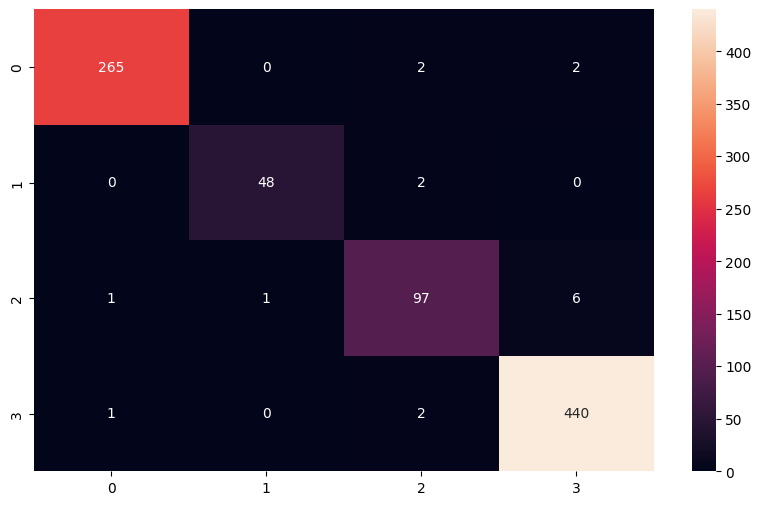

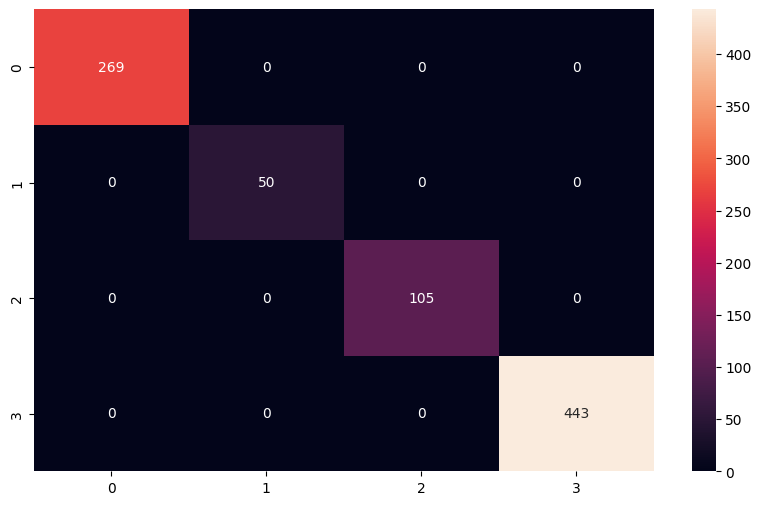

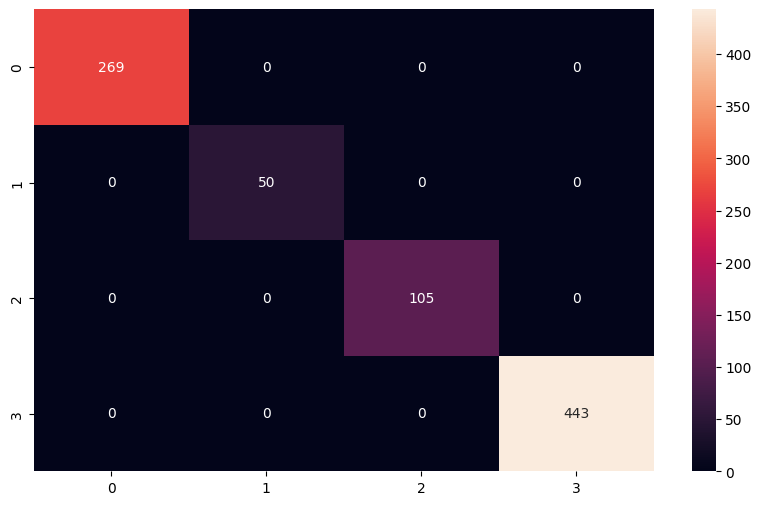

<module 'matplotlib.pyplot' from 'c:\\Users\\Adam\\Documents\\TUWien\\2024WS\\MachineLearning\\MachineLearingn2024SS\\venv\\Lib\\site-packages\\matplotlib\\pyplot.py'>

In [26]:
from visualisation import plot_confusion_matrix

plot_confusion_matrix(testY, y_predKNN, "hpc_knn")
plot_confusion_matrix(testY, y_predSVC, "hpc_svc")
plot_confusion_matrix(testY, y_predDT, "hpc_dt")